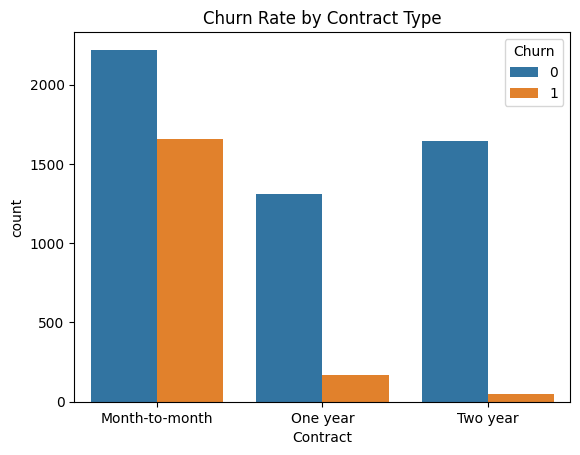

In [2]:
#Importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Telco Churn CSV
df = pd.read_csv('../data/telco_churn.csv')

#Converting "Yes" and "No" into binary 1/0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

#Testing: Churn by contract type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import joblib

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('Churn', axis = 1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=50000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.814762   0.684211  0.557641  0.614476
3              XGBoost  0.786373   0.607143  0.546917  0.575458
2        Random Forest  0.797019   0.659341  0.482574  0.557276
1        Decision Tree  0.718950   0.469816  0.479893  0.474801


In [4]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

print(f"\nClassification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



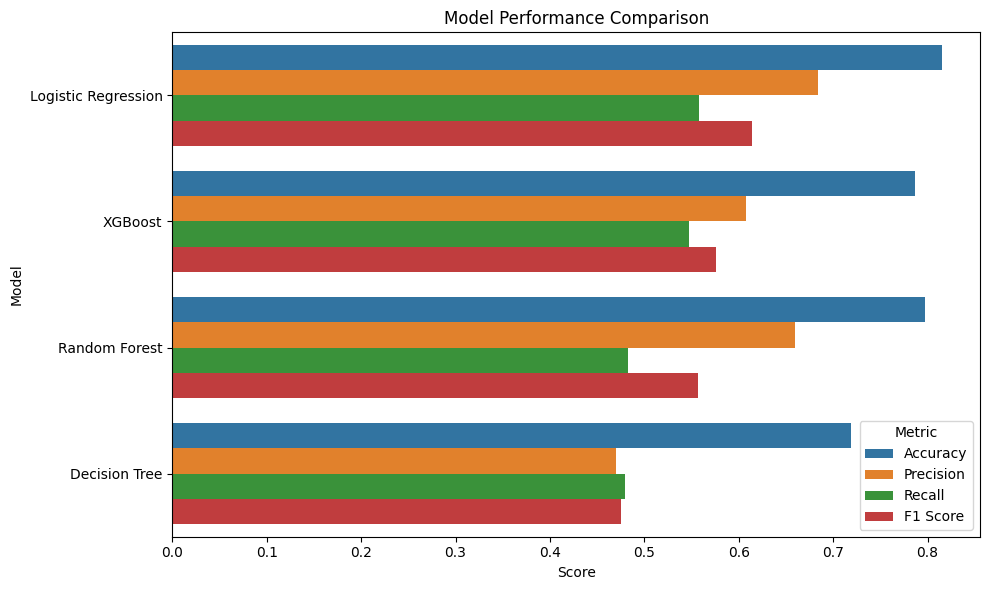

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score']),
    x='value', y='Model', hue='variable'
)
plt.title("Model Performance Comparison")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title='Metric')
plt.tight_layout()
plt.show()